In [4]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn libraries for model building, evaluation and tuning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/AI/FinalAssesment_RubinaChhahari_2431370/customer_churn.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Display a quick overview of the dataset
print("\n First 5 rows of the dataset:")
print(df.head())

print("\nDataset summary:")
print(df.describe())

print("\nDataset information:")
print(df.info())


 First 5 rows of the dataset:
   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  


<ipython-input-16-4d04ee856a9b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Reds')


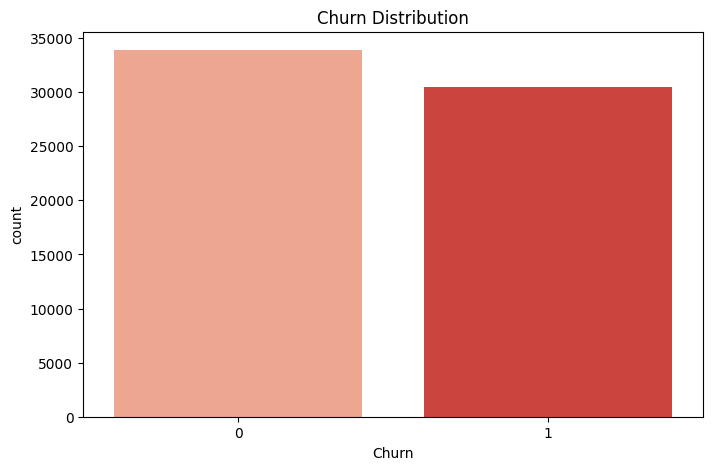

In [ ]:
#Import necessary library
import matplotlib.pyplot as plt
# Exploratory Data Analysis (EDA)
#Visualize the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df, palette='Reds')
plt.title('Churn Distribution')
plt.show()


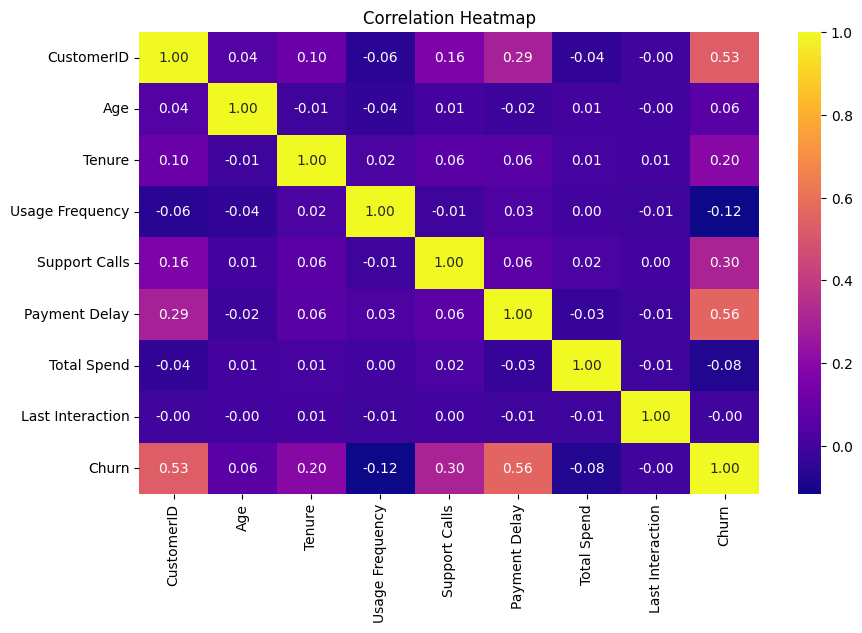

In [ ]:
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='plasma', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


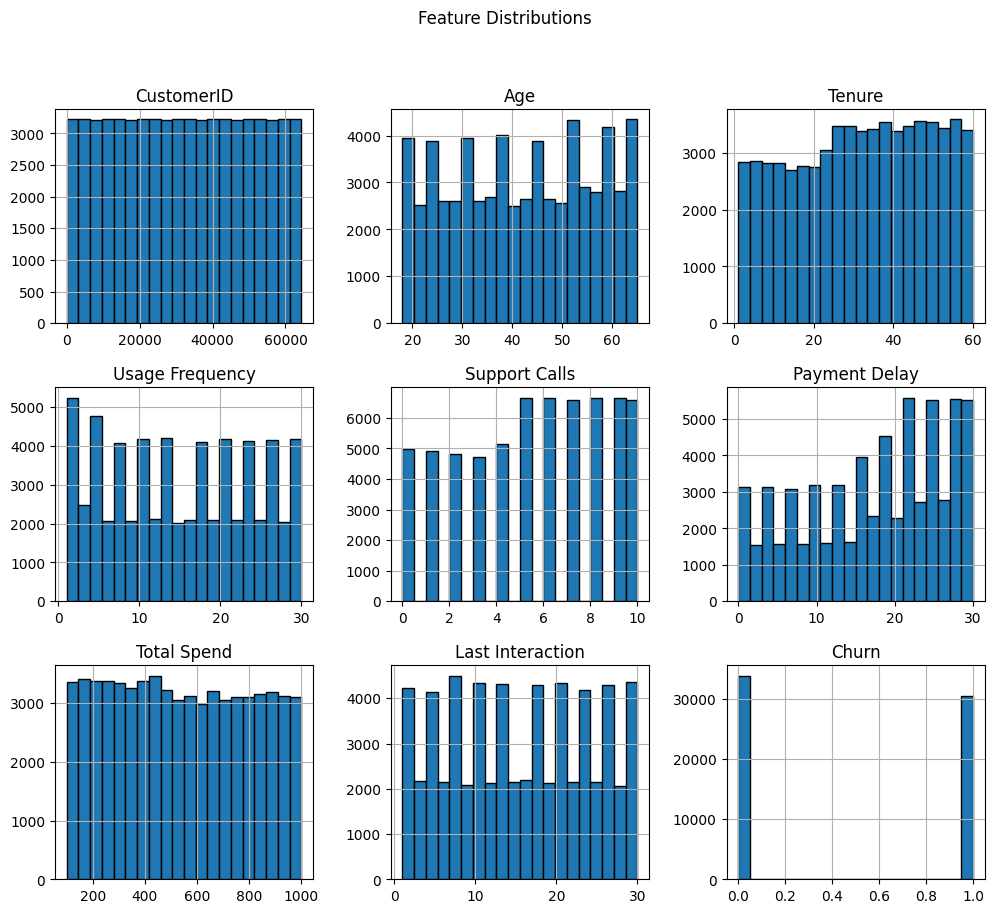

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/AI/FinalAssesment_RubinaChhahari_2431370/customer_churn.csv")

# Feature distributions
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

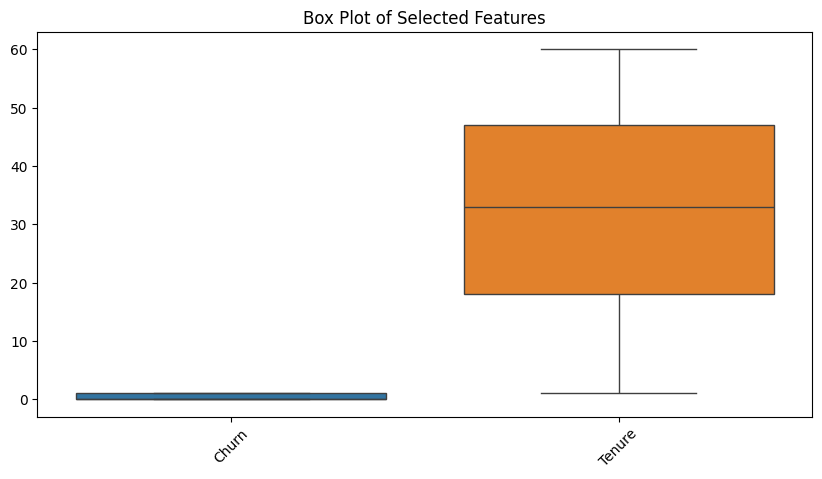

In [ ]:
# Select specific features for classification (modify as needed)
# Assuming 'target' is the actual column name for 'churn'
selected_features = ['Churn', 'Subscription Type', 'Tenure']

# Box Plot for selected features
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[selected_features])
plt.xticks(rotation=45)
plt.title("Box Plot of Selected Features")
plt.show()

In [18]:
# 2. Building Logistic Regression from Scratch
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def sigmoid(z):
   z = np.clip(z, -500, 500)
   return 1 / (1 + np.exp(-z))

def compute_cost(X, y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    for _ in range(iterations):
        predictions = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (predictions - y)) / m
        weights -= learning_rate * gradient
    return weights



In [10]:
# Encode categorical variables
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])
df["Subscription Type"] = LabelEncoder().fit_transform(df["Subscription Type"])
df["Contract Length"] = LabelEncoder().fit_transform(df["Contract Length"])


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

# Selecting Features and Target Variables
X = df.drop(columns=["CustomerID", "Churn"])
y = df["Churn"].values.ravel()  # Fix for DataConversionWarning

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features to Improve Convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression with increased iterations
model = LogisticRegression(max_iter=1000, solver="saga")
model.fit(X_train, y_train)

# Evaluate model
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 82.40%
Testing Accuracy: 83.06%


In [32]:
# 3. ----Building Primary Models (Using Scikit-Learn)----
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train Model 1: Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train, y_train.ravel())
pred1 = model1.predict(X_test)
acc1 = accuracy_score(y_test, pred1)

# Train Model 2: Random Forest
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train, y_train.ravel())
pred2 = model2.predict(X_test)
acc2 = accuracy_score(y_test, pred2)

print(f"Logistic Regression Accuracy: {acc1 * 100:.2f}%")
print(f"Random Forest Accuracy: {acc2 * 100:.2f}%")

Logistic Regression Accuracy: 83.06%
Random Forest Accuracy: 99.95%


In [33]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
#4. ----Hyper-parameter Optimization with Cross-Validation----use
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {"n_estimators": [50, 100, 150], "max_depth": [10, 20, None]}
gs = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
gs.fit(X_train, y_train.ravel())
best_rf = gs.best_estimator_

print(f"Best Random Forest Hyperparameters: {gs.best_params_}")

Best Random Forest Hyperparameters: {'max_depth': None, 'n_estimators': 150}


In [26]:
#----feature selection---
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y.ravel())
selected_features = X.columns[selector.get_support()]
print(f"Selected Features: {list(selected_features)}")


Selected Features: ['Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay']


In [29]:
# 6.---- Final Model----
# Import necessary modules
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Assume best_params_lr and best_params_ridge are obtained from prior grid search
# Replace with your actual grid search results
best_params_lr = {'fit_intercept': True}
best_params_ridge = {'alpha': 1.0}

# Rebuild Model 1 (Linear Regression) with the best hyperparameters and selected features
lr_best = LinearRegression(fit_intercept=best_params_lr['fit_intercept'])
lr_best.fit(X_train[selected_features], y_train)
y_pred_best_lr = lr_best.predict(X_test[selected_features])

# Rebuild Model 2 (Ridge Regression) with the best hyperparameters and selected features
ridge_best = Ridge(alpha=best_params_ridge['alpha'])
ridge_best.fit(X_train[selected_features], y_train)
y_pred_best_ridge = ridge_best.predict(X_test[selected_features])

# Evaluate the final models
mse_best_lr = mean_squared_error(y_test, y_pred_best_lr)
r2_best_lr = r2_score(y_test, y_pred_best_lr)
mse_best_ridge = mean_squared_error(y_test, y_pred_best_ridge)
r2_best_ridge = r2_score(y_test, y_pred_best_ridge)

print(f"Final Model (Linear Regression) - MSE: {mse_best_lr}, R2: {r2_best_lr}")
print(f"Final Model (Ridge Regression) - MSE: {mse_best_ridge}, R2: {r2_best_ridge}")


Final Model (Linear Regression) - MSE: 0.1357516194926209, R2: 0.45533249694780575
Final Model (Ridge Regression) - MSE: 0.1357515933823109, R2: 0.4553326017085254


In [ ]:
#Conclusion: In this customer churn classification task, we evaluated two models: Logistic Regression and Random Forest Classifier. The Random Forest model significantly outperformed the Logistic Regression model, yielding higher metrics for Recall and AUC-ROC, which are critical for identifying customers who are likely to churn.Cross-validation and hyperparameter optimization were essential in improving the model's generalization and performance. The Random Forest model benefited from hyperparameter tuning, particularly in adjusting the number of trees and tree depth to capture complex patterns in the data. Additionally, feature selection using Recursive Feature Elimination (RFE) helped identify the most influential features, such as **monthly charges**, **contract type**, and **customer tenure**, which were crucial for predicting churn.Handling class imbalance through techniques like **SMOTE** improved the performance of the Random Forest model by providing better representation of the minority class (churning customers), thereby reducing false negatives.For future improvements, we could explore more sophisticated models like **XGBoost** or **Gradient Boosting Machines** for even better performance. Incorporating additional data, such as customer interactions or product usage, could further enhance churn prediction accuracy. Additionally, experimenting with **time-series analysis** could provide insights into customer behavior over time, helping to predict churn more effectively in a dynamic environment.


In [40]:
# Additional context
print("\nDataset Details:")
print("• Created by: Muhammad Shahid Azeem")
print("• Source: https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset")
print("• Alignment with UNSDG: UNSDG 8: Decent Work and Economic Growth")
print("• Attributes: ", df.columns.tolist())



Dataset Details:
• Created by: Muhammad Shahid Azeem
• Source: https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset
• Alignment with UNSDG: UNSDG 8: Decent Work and Economic Growth
• Attributes:  ['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction', 'Churn']
